# Análisis de Resultados de Pruebas Diagnósticas de COVID-19

# Procesamiento de Datos COVID

Este script de Python realiza el procesamiento y análisis de datos relacionados con casos de COVID-19. A continuación, se describen las principales funcionalidades del código:

## Importación de Bibliotecas
- Utiliza `pandas` para manipulación de datos.
- Emplea `numpy` para operaciones numéricas.
- Usa `os` para operaciones del sistema de archivos.
- Importa `matplotlib.pyplot` para visualizaciones (aunque no se usa en este fragmento).

## Funciones Auxiliares
1. `convertir_a_binario(valor)`:
   - Convierte diversos formatos de entrada a valores binarios (0, 1) o NaN.
   - Maneja diferentes tipos de datos: numéricos, strings y valores faltantes.

2. `categorizar_comorbilidades(valor)`:
   - Categoriza el número total de comorbilidades en grupos.
   - Incluye una categoría para datos insuficientes.

## Carga y Procesamiento de Datos
1. Intenta cargar el archivo CSV con diferentes codificaciones.
2. Define listas de comorbilidades y síntomas.
3. Aplica la conversión binaria a las columnas de comorbilidades y síntomas.
4. Limpia y convierte la columna de edad a formato numérico.
5. Calcula el total de comorbilidades y síntomas para cada caso.
6. Categoriza los casos según el número de comorbilidades.

## Análisis y Presentación de Datos
1. Muestra información general sobre el DataFrame procesado.
2. Presenta las primeras 5 filas de los datos procesados.
3. Calcula y muestra estadísticas detalladas para cada padecimiento y síntoma:
   - Casos válidos y su porcentaje.
   - Casos positivos y su porcentaje.
   - Casos sin datos.

## Almacenamiento de Resultados
- Guarda el DataFrame procesado en un nuevo archivo CSV.

## Manejo de Errores
- Incluye manejo de excepciones para errores durante la carga y procesamiento de datos.
- Verifica la existencia del archivo de entrada antes de procesarlo.

Este script es útil para preparar y analizar datos de COVID-19, proporcionando una visión clara de la prevalencia de diferentes comorbilidades y síntomas en la población estudiada.

In [44]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# Ruta del archivo
ruta_archivo = r"C:\Users\carmen.h\datos_covid_2020.csv"

# Función para convertir valores a binario
def convertir_a_binario(valor):
    if pd.isna(valor):
        return np.nan  # Mantener NaN para valores faltantes
    elif isinstance(valor, (int, float)):
        return 1 if valor >= 1 else 0
    elif isinstance(valor, str):
        valor = valor.upper().strip()
        if valor in ['SI', 'SÍ', 'YES', '1', 'TRUE', 'VERDADERO']:
            return 1
        elif valor in ['NO', '0', 'FALSE', 'FALSO']:
            return 0
        else:
            return np.nan  # Valor no reconocido
    else:
        return np.nan

# Función para categorizar comorbilidades
def categorizar_comorbilidades(valor):
    if pd.isna(valor):
        return 'Datos insuficientes'
    elif valor == 0:
        return 'Sin comorbilidades'
    elif valor == 1:
        return '1 comorbilidad'
    elif valor == 2:
        return '2 comorbilidades'
    elif 3 <= valor <= 5:
        return '3-5 comorbilidades'
    else:
        return 'Más de 5 comorbilidades'

# Cargar y procesar los datos
if os.path.exists(ruta_archivo):
    try:
        # Intentar cargar el archivo CSV con diferentes codificaciones
        for encoding in ['utf-8', 'latin1', 'ISO-8859-1']:
            try:
                df = pd.read_csv(ruta_archivo, encoding=encoding)
                print(f"Archivo cargado exitosamente con codificación: {encoding}")
                break
            except UnicodeDecodeError:
                continue
        else:
            print("No se pudo cargar el archivo con las codificaciones intentadas.")
            df = None

        if df is not None:
            # Listas de comorbilidades y síntomas
            comorbilidades = ['DIABETES', 'ENF_PULMONAR', 'ASMA', 'CONJUNTIVITIS', 'INMUNOSUPRESION', 'VIH_SIDA',
                              'ENFERMEDAD_CARDIACA', 'OBESIDAD', 'HIPERTENSION_ARTERIAL', 
                              'INSUF_RENAL_CRONICA', 'TABAQUISMO', 'CANCER', 'ENFERMEDAD_HEPATICA']
            sintomas = ['DOLOR_PECHO', 'PARARSE', 'CONVULSIONES', 'FIEBRE', 'TOS_SECA',
                        'CONGESTION_NASAL', 'CANSANCIO_FATIGA', 'TOS_CON_ESPECTORACION_FLEMA',
                        'DIFICULTAD_RESPIRATORIA', 'ATAQUE_AL_ESTADO_GENERAL', 'DOLOR_DE_CABEZA',
                        'IRRITABILIDAD', 'ESCALOFRIOS', 'DOLOR_EN_HUESOS', 'DOLOR_MUSCULAR',
                        'ESCURRIMIENTO_NASAL', 'ARDOR_DE_GARGANTA', 'GRIPA_O_RESFRIADO',
                        'CONJUNTIVITIS', 'DIARREA', 'VOMITO', 'DOLOR_ABDOMINAL', 'OTRO',
                        'RESPIRACION_RAPIDA']

            # Aplicar la conversión a las columnas de padecimientos y síntomas
            for columna in comorbilidades + sintomas:
                if columna in df.columns:
                    df[columna] = df[columna].apply(convertir_a_binario)

            # Limpiar y convertir la columna EDAD a numérico
            df['EDAD'] = pd.to_numeric(df['EDAD'], errors='coerce')

            # Crear nuevas columnas para el total de comorbilidades y síntomas
            df['NUEVO_TOTAL_COMORBILIDAD'] = df[comorbilidades].sum(axis=1, skipna=False)
            df['NUEVO_TOTAL_SINTOMAS'] = df[sintomas].sum(axis=1, skipna=False)

            # Aplicar la categorización de comorbilidades
            df['CATEGORIA_COMORBILIDAD'] = df['NUEVO_TOTAL_COMORBILIDAD'].apply(categorizar_comorbilidades)

            # Mostrar información sobre el DataFrame procesado
            print(df.info())

            # Mostrar las primeras filas del DataFrame procesado
            print("\nPrimeras 5 filas de los datos procesados:")
            print(df[['EDAD'] + comorbilidades + sintomas + ['NUEVO_TOTAL_COMORBILIDAD', 'CATEGORIA_COMORBILIDAD', 'NUEVO_TOTAL_SINTOMAS']].head())

            # Calcular y mostrar estadísticas para cada padecimiento y síntoma
            print("\nEstadísticas para cada padecimiento y síntoma:")
            for columna in comorbilidades + sintomas:
                if columna in df.columns:
                    total_casos = df[columna].sum()
                    casos_validos = df[columna].count()
                    casos_nulos = df[columna].isnull().sum()
                    porcentaje_validos = (casos_validos / len(df) * 100).round(2)
                    porcentaje_positivos = (total_casos / casos_validos * 100).round(2) if casos_validos > 0 else 0
                    print(f"{columna}:")
                    print(f"  - Casos válidos: {casos_validos} ({porcentaje_validos}% del total)")
                    print(f"  - Casos positivos: {total_casos} ({porcentaje_positivos}% de los válidos)")
                    print(f"  - Casos sin datos: {casos_nulos}")

            # Guardar el DataFrame procesado en un nuevo archivo CSV
            ruta_salida = os.path.join(os.path.dirname(ruta_archivo), 'datos_covid_procesados.csv')
            df.to_csv(ruta_salida, index=False)
            print(f"\nLos datos procesados han sido guardados en '{ruta_salida}'")

    except Exception as e:
        print(f"Ocurrió un error al procesar el archivo: {str(e)}")
else:
    print(f"El archivo no se encuentra en la ruta especificada: {ruta_archivo}")

C:\Users\carmen.herrera\AppData\Local\Temp\ipykernel_23056\2031511113.py:47: DtypeWarning: Columns (0,9,10,11,12,13,14,17,19,20,21,22,23,24,25,26,29,32,43,45,47,49,51,53,55,57,59,61,63,65,67,69,71,73,75,77,79,81,83,85,87,106,107,108,109,110,111,112,113) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ruta_archivo, encoding=encoding)


Archivo cargado exitosamente con codificación: latin1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260019 entries, 0 to 260018
Columns: 118 entries, ID_TAMIZ to CATEGORIA_COMORBILIDAD
dtypes: float64(42), object(76)
memory usage: 234.1+ MB
None

Primeras 5 filas de los datos procesados:
   EDAD  DIABETES  ENF_PULMONAR  ASMA  CONJUNTIVITIS  INMUNOSUPRESION  \
0  43.0       0.0           0.0   0.0            0.0              0.0   
1  41.0       0.0           0.0   0.0            0.0              0.0   
2  41.0       0.0           0.0   0.0            0.0              0.0   
3  56.0       0.0           0.0   0.0            0.0              0.0   
4  27.0       0.0           0.0   0.0            0.0              0.0   

   VIH_SIDA  ENFERMEDAD_CARDIACA  OBESIDAD  HIPERTENSION_ARTERIAL  ...  \
0       0.0                  0.0       0.0                    0.0  ...   
1       0.0                  0.0       0.0                    0.0  ...   
2       0.0                  0.0       0.0    

# Preprocesamiento de Datos COVID-19

Este script realiza varias operaciones de limpieza y preprocesamiento en un conjunto de datos relacionados con COVID-19. A continuación, se detallan los pasos principales:

## Conversión de Fechas
- Convierte varias columnas de fecha a formato datetime de pandas.
- Columnas procesadas: FECHA_LLAMADA, FECHA_NACIMIENTO, FECHA_VIAJE, FECHA_LLEGADA, FECHA_VALORACION, FECHA_MUESTRA.

## Cálculo de Edad
- Calcula la edad de los pacientes utilizando la función `calcular_edad` (definida previamente).
- Crea una nueva columna 'EDAD_CALCULADA'.

## Procesamiento de Comorbilidades
- Convierte las columnas de comorbilidades a formato binario.
- Comorbilidades incluidas: DIABETES, ENF_PULMONAR, ASMA, INMUNOSUPRESION, VIH_SIDA, ENFERMEDAD_CARDIACA, OBESIDAD, HIPERTENSION_ARTERIAL, INSUF_RENAL_CRONICA, TABAQUISMO, CANCER, ENFERMEDAD_HEPATICA.
- Utiliza la función `convertir_a_binario` para la conversión.

## Cálculo y Categorización de Comorbilidades
- Calcula el total de comorbilidades para cada paciente.
- Crea una nueva columna 'NUEVO_TOTAL_COMORBILIDAD'.
- Categoriza las comorbilidades utilizando la función `categorizar_comorbilidades`.
- Crea una nueva columna 'CATEGORIA_COMORBILIDAD'.

## Limpieza de Otras Columnas
- Convierte la columna 'SEXO' a mayúsculas.
- Convierte la columna 'RESULTADO_LABORATORIO' a mayúsculas.

## Resumen y Visualización de Datos
- Muestra información general sobre el DataFrame procesado.
- Presenta las primeras 5 filas de los datos preprocesados, incluyendo la edad calculada, comorbilidades, total de comorbilidades y categoría.

## Estadísticas de Comorbilidades
- Calcula y muestra el total de casos para cada comorbilidad.
- Presenta el número de casos y el porcentaje respecto al total de registros.

Este script es crucial para preparar los datos para análisis posteriores, asegurando la consistencia y facilitando la interpretación de la información relacionada con los casos de COVID-19.

In [45]:

# Convertir fechas
fecha_columnas = ['FECHA_LLAMADA', 'FECHA_NACIMIENTO', 'FECHA_VIAJE', 'FECHA_LLEGADA', 'FECHA_VALORACION', 'FECHA_MUESTRA']
for col in fecha_columnas:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

# Calcular edad usando la función de la celda 2
df['EDAD_CALCULADA'] = df['FECHA_NACIMIENTO'].apply(calcular_edad)

# Convertir columnas de comorbilidades a binario
comorbilidades = ['DIABETES', 'ENF_PULMONAR', 'ASMA', 'INMUNOSUPRESION', 'VIH_SIDA',
                  'ENFERMEDAD_CARDIACA', 'OBESIDAD', 'HIPERTENSION_ARTERIAL', 
                  'INSUF_RENAL_CRONICA', 'TABAQUISMO', 'CANCER', 'ENFERMEDAD_HEPATICA']

for comorbilidad in comorbilidades:
    if comorbilidad in df.columns:
        df[comorbilidad] = df[comorbilidad].apply(convertir_a_binario)

# Calcular el nuevo total de comorbilidades
df['NUEVO_TOTAL_COMORBILIDAD'] = df[comorbilidades].sum(axis=1)

# Categorizar comorbilidades
df['CATEGORIA_COMORBILIDAD'] = df['NUEVO_TOTAL_COMORBILIDAD'].apply(categorizar_comorbilidades)

# Limpiar y convertir otras columnas importantes
if 'SEXO' in df.columns:
    df['SEXO'] = df['SEXO'].str.upper()

if 'RESULTADO_LABORATORIO' in df.columns:
    df['RESULTADO_LABORATORIO'] = df['RESULTADO_LABORATORIO'].str.upper()

# Mostrar información sobre el DataFrame preprocesado
print(df.info())

# Mostrar las primeras filas del DataFrame preprocesado
print("\nPrimeras 5 filas de los datos preprocesados:")
columnas_mostrar = ['EDAD_CALCULADA'] + comorbilidades + ['NUEVO_TOTAL_COMORBILIDAD', 'CATEGORIA_COMORBILIDAD']
print(df[columnas_mostrar].head())

# Calcular y mostrar el total de casos para cada comorbilidad
print("\nTotal de casos para cada comorbilidad:")
for comorbilidad in comorbilidades:
    if comorbilidad in df.columns:
        total_casos = df[comorbilidad].sum()
        porcentaje = (total_casos / len(df) * 100).round(2)
        print(f"{comorbilidad}: {total_casos} casos ({porcentaje}%)")

C:\Users\carmen.herrera\AppData\Local\Temp\ipykernel_23056\1417517526.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
C:\Users\carmen.herrera\AppData\Local\Temp\ipykernel_23056\1417517526.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
C:\Users\carmen.herrera\AppData\Local\Temp\ipykernel_23056\1417517526.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')
C:\Users\carmen.herrera\AppData\Local\Temp\ipykernel_23056\14

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260019 entries, 0 to 260018
Columns: 119 entries, ID_TAMIZ to EDAD_CALCULADA
dtypes: datetime64[ns](6), float64(43), object(70)
memory usage: 236.1+ MB
None

Primeras 5 filas de los datos preprocesados:
   EDAD_CALCULADA  DIABETES  ENF_PULMONAR  ASMA  INMUNOSUPRESION  VIH_SIDA  \
0             NaN       0.0           0.0   0.0              0.0       0.0   
1             NaN       0.0           0.0   0.0              0.0       0.0   
2             NaN       0.0           0.0   0.0              0.0       0.0   
3             NaN       0.0           0.0   0.0              0.0       0.0   
4             NaN       0.0           0.0   0.0              0.0       0.0   

   ENFERMEDAD_CARDIACA  OBESIDAD  HIPERTENSION_ARTERIAL  INSUF_RENAL_CRONICA  \
0                  0.0       0.0                    0.0                  0.0   
1                  0.0       0.0                    0.0                  0.0   
2                  0.0       0.0      

# Limpieza y Validación de Datos de Edad

Este fragmento de código se enfoca en la limpieza y validación de los datos de edad en un conjunto de datos, presumiblemente relacionados con casos de COVID-19. El proceso incluye los siguientes pasos:

## Definición de Rango Válido para Edad

1. Se establece un rango razonable para la edad:
   - Mínimo: 0 años
   - Máximo: 120 años

2. Se crea una máscara booleana `edad_valida`:
   - Identifica las edades que están dentro del rango definido.
   - Utiliza operaciones lógicas para filtrar los valores.

## Limpieza de Datos de Edad

- Se aplica la máscara `edad_valida` a la columna 'EDAD':
  - Los valores dentro del rango (0-120 años) se mantienen.
  - Los valores fuera de este rango se reemplazan por `np.nan` (Not a Number).

## Verificación de Resultados

- Se utiliza el método `describe()` para generar estadísticas descriptivas de la columna 'EDAD':
  - Muestra un resumen que incluye conteo, media, desviación estándar, mínimo, máximo y cuartiles.
  - Permite verificar si se han eliminado co

In [46]:
# Definir un rango razonable para la edad, de 0 a 120 años
edad_valida = (df['EDAD'] >= 0) & (df['EDAD'] <= 120)
df['EDAD'] = df['EDAD'].where(edad_valida, np.nan)

# Verificar si se corrigieron los valores inválidos
print(df['EDAD'].describe())


count    252723.000000
mean         38.521373
std          14.996726
min           0.000000
25%          27.000000
50%          36.000000
75%          48.000000
max         120.000000
Name: EDAD, dtype: float64


# Estimación de Fecha de Nacimiento basada en Edad

Este código realiza una estimación simple de la fecha de nacimiento de los individuos en el conjunto de datos, basándose en su edad actual. El proceso se desglosa de la siguiente manera:

## Importación de Módulos

- Se importa `datetime` del módulo `datetime` para manejar operaciones con fechas.

## Cálculo de Fecha de Nacimiento Estimada

1. Se crea una nueva columna 'FECHA_ESTIMADA_NACIMIENTO' en el DataFrame.
2. Para cada registro, se calcula la fecha de nacimiento estimada:
   - Se obtiene el año actual usando `datetime.now().year`.
   - Se resta la edad del individuo (columna 'EDAD') al año actual.
   - El resultado se convierte a un objeto datetime usando `pd.to_datetime()`.
   - Se especifica el formato '%Y' para indicar que solo se está utilizando el año.

## Visualización de Resultados

- Se muestran los primeros 10 registros del DataFrame.
- Se incluyen las columnas 'EDAD' y 'FECHA_ESTIMADA_NACIMIENTO' para comparación.

## Consideraciones Importantes

- Este método asume que la columna 'EDAD' contiene datos válidos y actualizados.
- La estimación es aproximada, ya que:
  - No considera el mes y día de nacimiento.
  - Asume que todos los individuos ya han cumplido años en el año en curso.
- Es útil para análisis que requieren una fecha aproximada de nacimiento, pero no debe usarse para cálculos precisos.

Esta técnica puede ser valiosa para análisis demográficos o epidemiológicos donde se necesita una referencia temporal, aunque sea aproximada, basada en la edad de los individuos.

In [47]:

from datetime import datetime

# Calcular la fecha de nacimiento basada en la edad (suponiendo que 'EDAD' es válida)
df['FECHA_ESTIMADA_NACIMIENTO'] = pd.to_datetime(datetime.now().year - df['EDAD'], format='%Y')

# Ver los primeros resultados
print(df[['EDAD', 'FECHA_ESTIMADA_NACIMIENTO']].head(10))


   EDAD FECHA_ESTIMADA_NACIMIENTO
0  43.0                1981-01-01
1  41.0                1983-01-01
2  41.0                1983-01-01
3  56.0                1968-01-01
4  27.0                1997-01-01
5  49.0                1975-01-01
6  27.0                1997-01-01
7  45.0                1979-01-01
8  44.0                1980-01-01
9  82.0                1942-01-01


In [48]:
# Contar cuántos valores nulos hay en 'EDAD'
print(df['EDAD'].isnull().sum())

# Si es necesario, eliminar los registros con edad nula:
df = df[df['EDAD'].notnull()]


7296


In [49]:
import pandas as pd
import numpy as np

# Distribución de edades
total_registros = len(df)
registros_con_edad = df['EDAD'].notna().sum()
porcentaje_con_edad = (registros_con_edad / total_registros) * 100

print(f"Total de registros: {total_registros}")
print(f"Registros con dato de edad: {registros_con_edad}")
print(f"Porcentaje de registros con edad: {porcentaje_con_edad:.2f}%")

# Para ver la distribución de edades
print("\nDistribución de edades:")
print(df['EDAD'].describe())

Total de registros: 252723
Registros con dato de edad: 252723
Porcentaje de registros con edad: 100.00%

Distribución de edades:
count    252723.000000
mean         38.521373
std          14.996726
min           0.000000
25%          27.000000
50%          36.000000
75%          48.000000
max         120.000000
Name: EDAD, dtype: float64


# Resumen General y Análisis Exploratorio de la Base de Datos COVID-19

Este script realiza un análisis exploratorio detallado de la base de datos COVID-19, proporcionando estadísticas clave y visualizaciones. A continuación, se desglosan las principales secciones:

## Configuración Inicial
- Importa las bibliotecas necesarias: matplotlib y seaborn.
- Configura una paleta de colores vibrante para las visualizaciones.

## Resumen General
1. Muestra el número total de registros y variables.
2. Presenta los tipos de datos de las columnas.
3. Proporciona información sobre valores nulos en cada columna.
4. Exhibe las primeras filas del DataFrame.
5. Ofrece un resumen estadístico de las columnas numéricas.

## Análisis de Variables Categóricas
- Identifica las columnas categóricas.
- Muestra los valores únicos y sus frecuencias para cada columna categórica.

## Análisis de Edad
- Crea un histograma de la distribución de edad (filtrado para el rango 0-100 años).
- Calcula y muestra estadísticas descriptivas de la edad.
- Determina el porcentaje de edades fuera del rango mostrado.

## Análisis de Comorbilidades
- Presenta un resumen de las comorbilidades, incluyendo el número de casos y porcentajes.
- Genera un histograma de la distribución del número total de comorbilidades por paciente.

1. Resumen general de la base de datos
Número total de registros: 252723
Número de variables: 120

Tipos de datos de las columnas:
ID_TAMIZ                             object
TIPO_PRUEBA                          object
FECHA_LLAMADA                datetime64[ns]
HORA_LLAMADA                         object
EMERGENCIA                           object
                                  ...      
NUEVO_TOTAL_COMORBILIDAD            float64
NUEVO_TOTAL_SINTOMAS                float64
CATEGORIA_COMORBILIDAD               object
EDAD_CALCULADA                      float64
FECHA_ESTIMADA_NACIMIENTO    datetime64[ns]
Length: 120, dtype: object

Cantidad de valores nulos por columna:
FECHA_LLAMADA               252723
FECHA_NACIMIENTO            252723
FECHA_VIAJE                 252723
EDAD_CALCULADA              252723
ENTIDAD                     252707
                             ...  
DOLOR_PECHO                     34
ID_TAMIZ                        20
ACEPTO_MUESTRA                  16
HOR

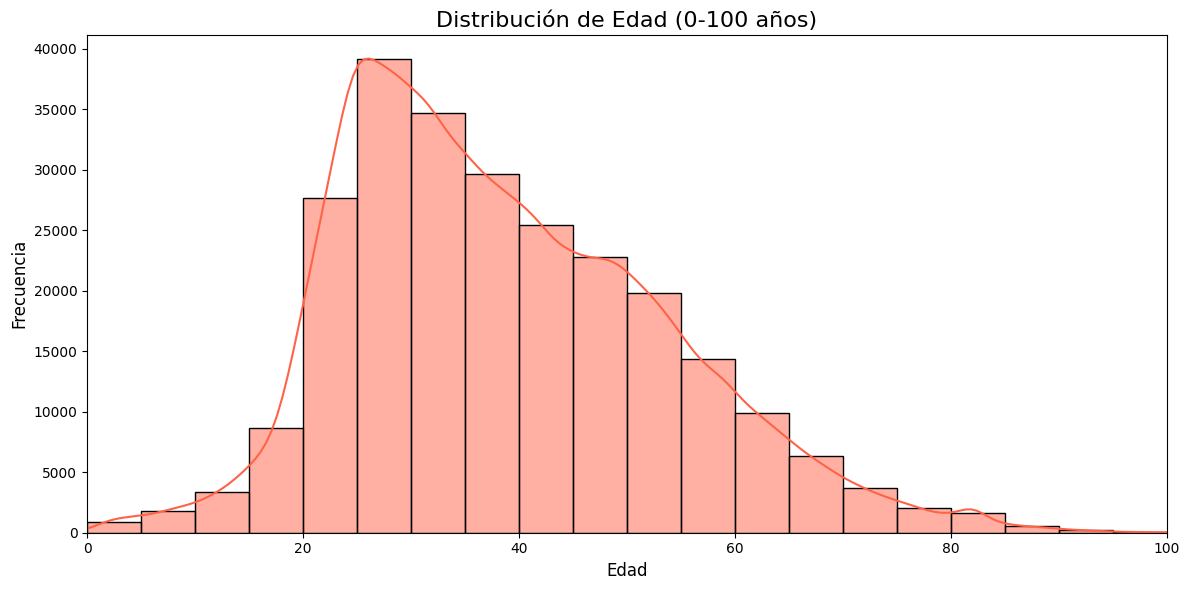


Estadísticas de Edad:
Media: 38.52
Mediana: 36.00
Desviación Estándar: 14.98
Mínimo: 0.00
Máximo: 100.00

Porcentaje de edades fuera del rango 0-100: 0.01%

Resumen de comorbilidades:
DIABETES: 13003.0 casos (5.15%)
ENF_PULMONAR: 1211.0 casos (0.48%)
ASMA: 9033.0 casos (3.57%)
INMUNOSUPRESION: 913.0 casos (0.36%)
VIH_SIDA: 519.0 casos (0.21%)
ENFERMEDAD_CARDIACA: 4029.0 casos (1.59%)
OBESIDAD: 35294.0 casos (13.97%)
HIPERTENSION_ARTERIAL: 19606.0 casos (7.76%)
INSUF_RENAL_CRONICA: 2054.0 casos (0.81%)
TABAQUISMO: 27877.0 casos (11.03%)
CANCER: 1096.0 casos (0.43%)
ENFERMEDAD_HEPATICA: 900.0 casos (0.36%)


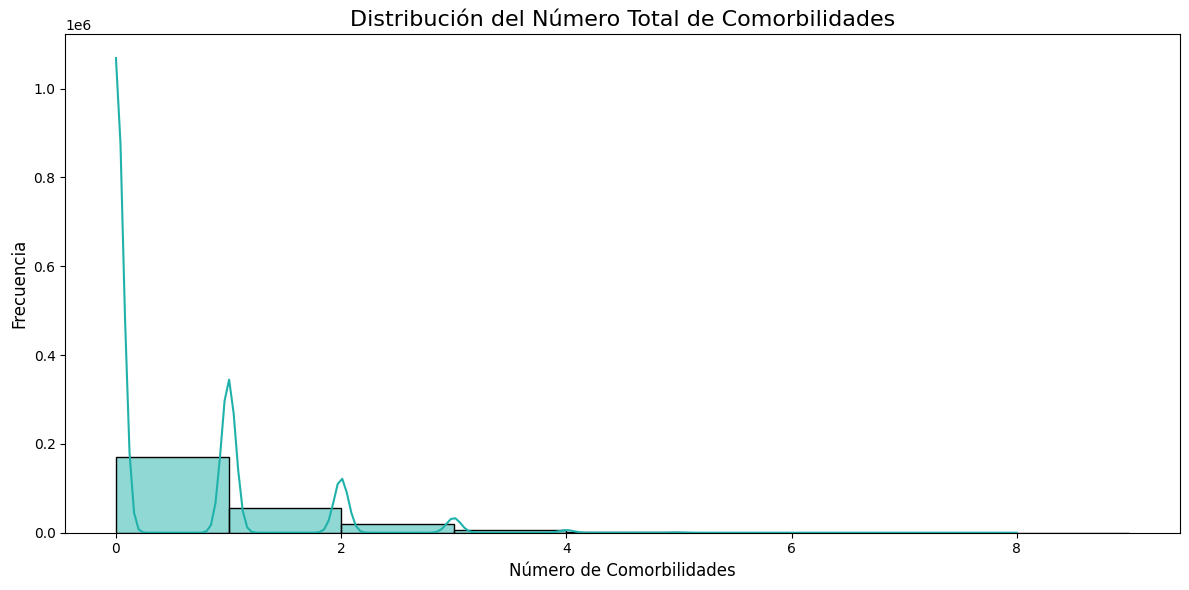

In [50]:
# Resumen General de la Base de Datos


import matplotlib.pyplot as plt
import seaborn as sns

# Establecer una paleta de colores vibrante
sns.set_palette("bright")

print("1. Resumen general de la base de datos")
print(f"Número total de registros: {len(df)}")
print(f"Número de variables: {df.shape[1]}")

# Mostrar los tipos de datos de las columnas
print("\nTipos de datos de las columnas:")
print(df.dtypes)

# Mostrar información sobre valores nulos
print("\nCantidad de valores nulos por columna:")
nulos = df.isnull().sum()
print(nulos[nulos > 0].sort_values(ascending=False))

# Mostrar las primeras filas del DataFrame
print("\nPrimeras filas del DataFrame:")
print(df.head())

# Resumen estadístico de columnas numéricas
print("\nResumen estadístico de columnas numéricas:")
print(df.describe())

# Mostrar las columnas categóricas y sus valores únicos
columnas_categoricas = df.select_dtypes(include=['object']).columns
print("\nColumnas categóricas y sus valores únicos:")
for col in columnas_categoricas:
    print(f"\n{col}:")
    print(df[col].value_counts().head())

# Visualización de la distribución de edad
if 'EDAD' in df.columns:
    # Filtrar edades dentro de un rango razonable
    edad_filtrada = df['EDAD'].dropna()
    edad_filtrada = edad_filtrada[(edad_filtrada >= 0) & (edad_filtrada <= 100)]

    # Usar los colores vibrantes para el histograma de edades
    plt.figure(figsize=(12, 6))
    sns.histplot(edad_filtrada, kde=True, bins=20, color='#FF6347')  # Elegir un color vibrante
    plt.title('Distribución de Edad (0-100 años)', fontsize=16)
    plt.xlabel('Edad', fontsize=12)
    plt.ylabel('Frecuencia', fontsize=12)
    plt.xlim(0, 100)

    # Mostrar el gráfico
    plt.tight_layout()
    plt.show()

    # Estadísticas descriptivas
    print("\nEstadísticas de Edad:")
    print(f"Media: {edad_filtrada.mean():.2f}")
    print(f"Mediana: {edad_filtrada.median():.2f}")
    print(f"Desviación Estándar: {edad_filtrada.std():.2f}")
    print(f"Mínimo: {edad_filtrada.min():.2f}")
    print(f"Máximo: {edad_filtrada.max():.2f}")

    # Porcentaje de datos fuera del rango mostrado
    total_edades = df['EDAD'].dropna().count()
    fuera_rango = total_edades - edad_filtrada.count()
    porcentaje_fuera = (fuera_rango / total_edades * 100) if total_edades > 0 else 0
    print(f"\nPorcentaje de edades fuera del rango 0-100: {porcentaje_fuera:.2f}%")

# Resumen de comorbilidades
comorbilidades = ['DIABETES', 'ENF_PULMONAR', 'ASMA', 'INMUNOSUPRESION', 'VIH_SIDA',
                  'ENFERMEDAD_CARDIACA', 'OBESIDAD', 'HIPERTENSION_ARTERIAL', 
                  'INSUF_RENAL_CRONICA', 'TABAQUISMO', 'CANCER', 'ENFERMEDAD_HEPATICA']

print("\nResumen de comorbilidades:")
for comorbilidad in comorbilidades:
    if comorbilidad in df.columns:
        total_casos = df[comorbilidad].sum()
        porcentaje = (total_casos / len(df) * 100).round(2)
        print(f"{comorbilidad}: {total_casos} casos ({porcentaje}%)")

# Visualización de la distribución de comorbilidades
if 'NUEVO_TOTAL_COMORBILIDAD' not in df.columns:
    # Si la columna no existe, se crea
    df['NUEVO_TOTAL_COMORBILIDAD'] = df[comorbilidades].sum(axis=1)

# Usar colores vibrantes para la distribución de comorbilidades
plt.figure(figsize=(12, 6))
sns.histplot(df['NUEVO_TOTAL_COMORBILIDAD'], 
             kde=True, 
             bins=range(0, int(df['NUEVO_TOTAL_COMORBILIDAD'].max()) + 2), 
             color='#20B2AA')
plt.title('Distribución del Número Total de Comorbilidades', fontsize=16)
plt.xlabel('Número de Comorbilidades', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


# Visualización de la Prevalencia de Comorbilidades en Pacientes COVID-19

Este script genera un gráfico de barras que muestra la prevalencia de diversas comorbilidades en una base de datos de pacientes con COVID-19. A continuación, se detallan los pasos principales:

## Importación de Bibliotecas
- Se utilizan `matplotlib.pyplot` y `seaborn` para la creación de gráficos.
- `pandas` se importa para el manejo de datos.

## Definición de Datos
1. Se define una lista de comorbilidades relevantes.
2. Se asigna un color específico a cada comorbilidad para mejorar la visualización.

## Procesamiento de Datos
1. Se calcula el número total de casos para cada comorbilidad.
2. Se determina el porcentaje de casos respecto al total de registros.
3. Se crea un DataFrame temporal con la información procesada.
4. El DataFrame se ordena de mayor a menor según el número de casos.

## Creación del Gráfico
1. Se genera un gráfico de barras utilizando `seaborn.barplot`.
2. Cada barra representa una comorbilidad, con su altura indicando el número de casos.
3. Se utilizan los colores personalizados para cada comorbilidad.

## Mejoras Visuales
1. Se añaden etiquetas sobre cada barra mostrando el número exacto de casos y el porcentaje.
2. Se ajustan los títulos y etiquetas de los ejes.
3. Las etiquetas del eje x (nombres de las comorbilidades) se rotan para mejorar la legibilidad.

## Presentación
- Se ajusta el layout para optimizar la visualización.
- El gráfico se muestra utilizando `plt.show()`.

Este script proporciona una representación visual clara y detallada de la prevalencia de comorbilidades en la población estudiada, facilitando la identificación rápida de las condiciones más comunes entre los pacientes con COVID-19.

C:\Users\carmen.herrera\AppData\Local\Temp\ipykernel_23056\774106526.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Comorbilidad', y='Total_Casos', data=df_comorbilidades, palette=colores_comorbilidades)


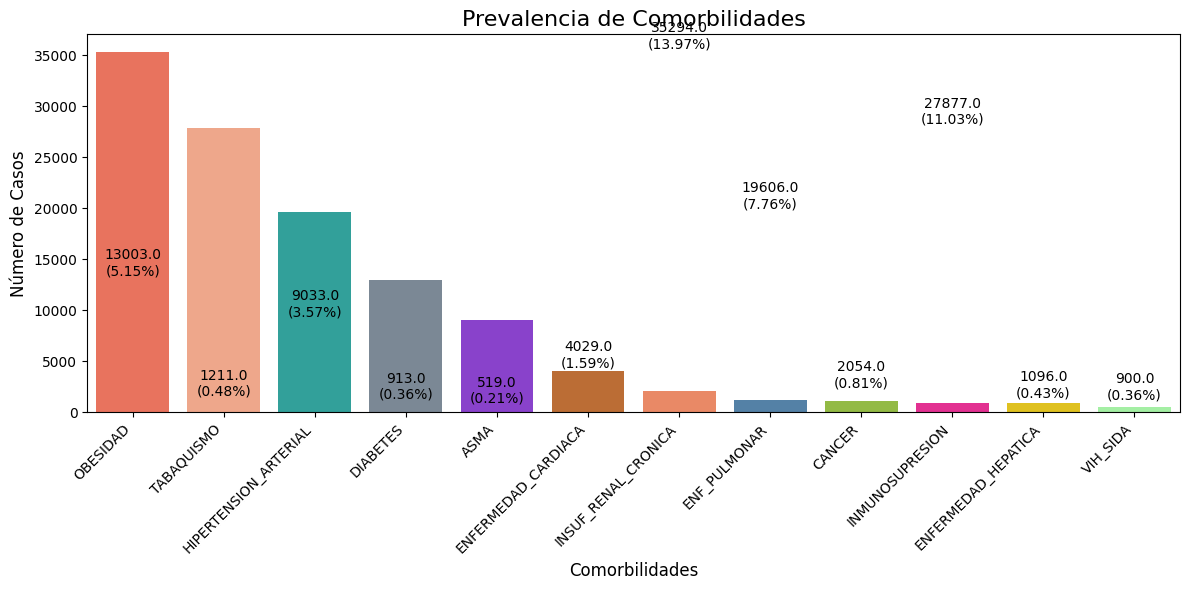

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definir las comorbilidades
comorbilidades = ['DIABETES', 'ENF_PULMONAR', 'ASMA', 'INMUNOSUPRESION', 'VIH_SIDA',
                  'ENFERMEDAD_CARDIACA', 'OBESIDAD', 'HIPERTENSION_ARTERIAL', 
                  'INSUF_RENAL_CRONICA', 'TABAQUISMO', 'CANCER', 'ENFERMEDAD_HEPATICA']

# Definir los colores específicos para cada comorbilidad
colores_comorbilidades = ['#FF6347', '#FFA07A', '#20B2AA', '#778899', '#8A2BE2', 
                          '#D2691E', '#FF7F50', '#4682B4', '#9ACD32', '#FF1493', 
                          '#FFD700', '#98FB98']

# Calcular el número total de casos por comorbilidad y porcentaje
total_casos = [df[comorbilidad].sum() for comorbilidad in comorbilidades]
total_registros = len(df)  # Número total de registros en el DataFrame
porcentaje_casos = [(casos / total_registros) * 100 for casos in total_casos]

# Crear un DataFrame temporal para organizar los datos
import pandas as pd
df_comorbilidades = pd.DataFrame({
    'Comorbilidad': comorbilidades,
    'Total_Casos': total_casos,
    'Porcentaje': porcentaje_casos
})

# Ordenar el DataFrame por el número total de casos (de mayor a menor)
df_comorbilidades = df_comorbilidades.sort_values(by='Total_Casos', ascending=False)

# Crear el gráfico de barras con los colores personalizados y ordenados
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='Comorbilidad', y='Total_Casos', data=df_comorbilidades, palette=colores_comorbilidades)

# Añadir etiquetas sobre las barras (frecuencia y porcentaje)
for i, row in df_comorbilidades.iterrows():
    plt.text(i, row['Total_Casos'] + 100, f'{row["Total_Casos"]}\n({row["Porcentaje"]:.2f}%)', 
             ha='center', va='bottom', fontsize=10, color='black')

# Títulos y etiquetas
plt.title('Prevalencia de Comorbilidades', fontsize=16)
plt.xlabel('Comorbilidades', fontsize=12)
plt.ylabel('Número de Casos', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()



In [61]:
# Resumen de síntomas
sintomas = ['FIEBRE', 'TOS', 'DOLOR_CABEZA', 'DOLOR_MUSCULAR', 'DOLOR_ARTICULAR',
            'DOLOR_GARGANTA', 'RINORREA', 'DISNEA', 'ANOSMIA', 'AGEUSIA',
            'DIARREA', 'VOMITO', 'ESCALOFRIOS', 'FATIGA', 'CONJUNTIVITIS']

print("\nResumen de síntomas:")
for sintoma in sintomas:
    if sintoma in df.columns:
        total_casos = df[sintoma].sum()
        porcentaje = (total_casos / len(df) * 100).round(2)
        print(f"{sintoma}: {total_casos} casos ({porcentaje}%)")


Resumen de síntomas:
FIEBRE: 80907.0 casos (32.01%)
DOLOR_MUSCULAR: 65446.0 casos (25.9%)
DIARREA: 41069.0 casos (16.25%)
VOMITO: 10784.0 casos (4.27%)
ESCALOFRIOS: 40962.0 casos (16.21%)
CONJUNTIVITIS: 43231.0 casos (17.11%)


## Análisis de variables demográficas

Analiza las principales variables demográficas:
- Estadísticas de edad
- Distribución por grupos de edad
- Distribución por género

```


In [52]:
import numpy as np
import pandas as pd

# Análisis de variables demográficas
print("\n2. Análisis de variables demográficas")

import pandas as pd

# Asegurando columna "edad"
if 'EDAD' in df.columns:
    # Crear los grupos de edad
    edad_grupos = pd.cut(df['EDAD'], bins=[0, 18, 40, 60, 80, 100], labels=['0-18', '19-40', '41-60', '61-80', '81-100'])
    
    # Contar las frecuencias de cada grupo
    frecuencia_edad = edad_grupos.value_counts().sort_index()
    
    # Mostrar los resultados
    print("\nFrecuencias de grupos de edad:")
    print(frecuencia_edad)
else:
    print("La columna 'EDAD' no existe en el DataFrame.")

# Distribución por género
if 'SEXO' in df.columns:
    print("\nDistribución por género:")
    print(df['SEXO'].value_counts(normalize=True) * 100)






2. Análisis de variables demográficas

Frecuencias de grupos de edad:
EDAD
0-18       11770
19-40     139448
41-60      79238
61-80      20033
81-100      2171
Name: count, dtype: int64

Distribución por género:
SEXO
MUJER     56.142042
HOMBRE    43.857958
Name: proportion, dtype: float64


#### Comorbilidades por genero, y por edad

## Análisis de síntomas

Realiza un análisis detallado de los síntomas reportados:
- Convierte las respuestas de síntomas a valores numéricos
- Calcula la frecuencia y porcentaje de cada síntoma
- Genera un gráfico de barras mostrando la distribución de síntomas
```

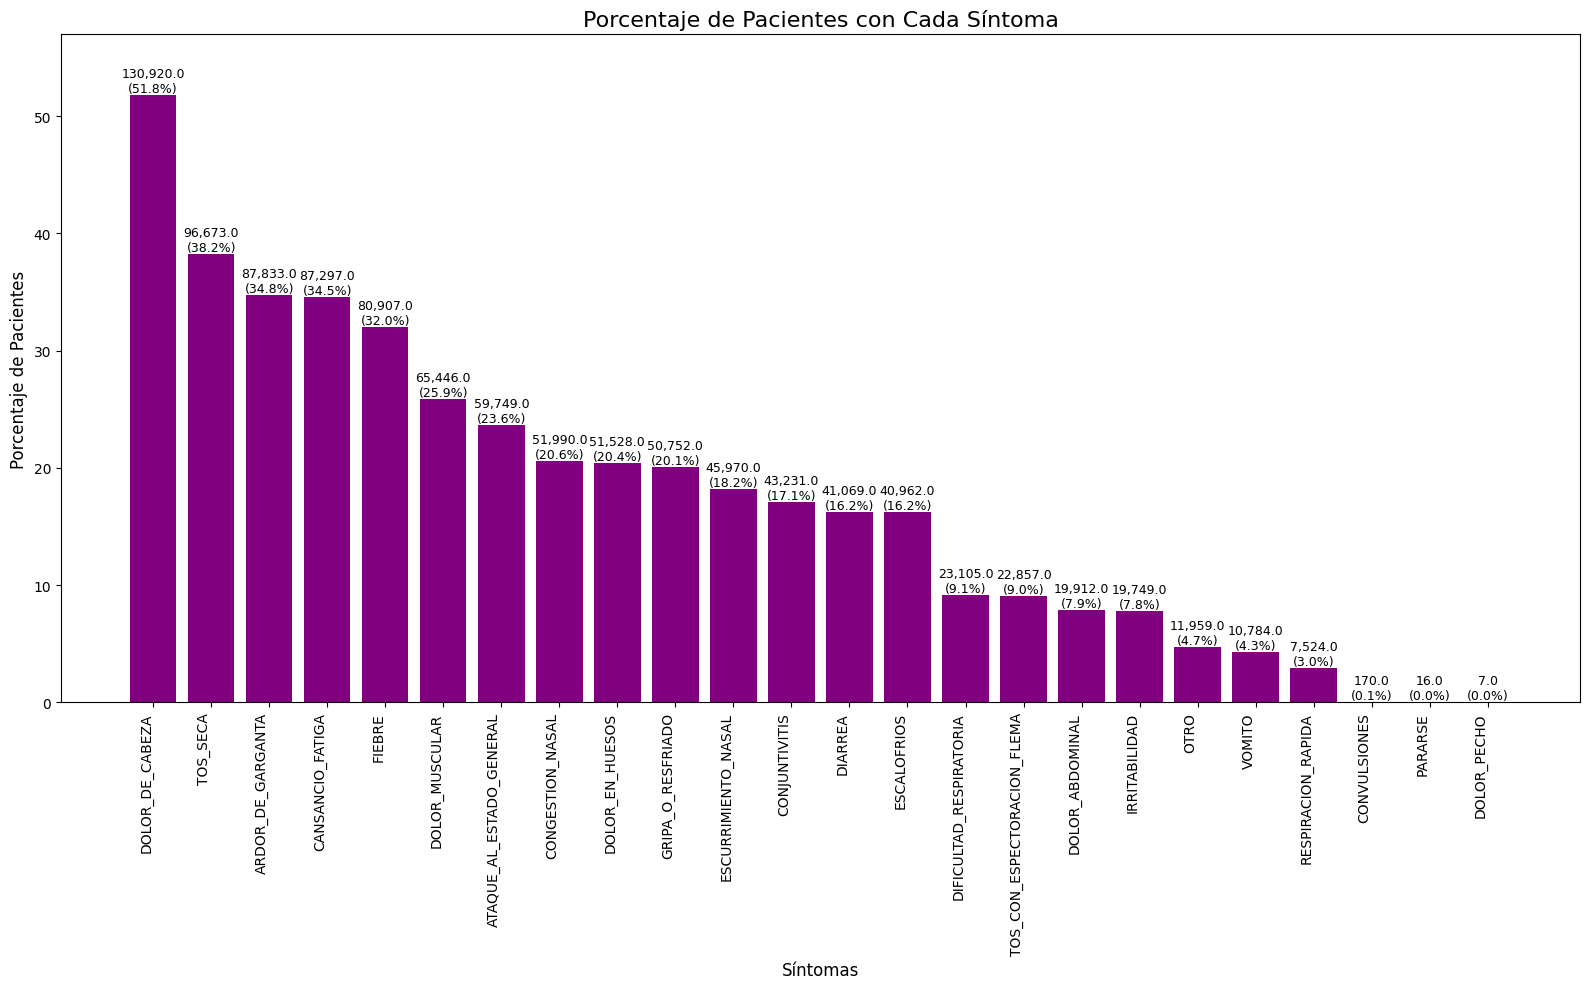

In [53]:
# Análisis de Síntomas


# Calcular sumas y porcentajes
sintomas_suma = df[sintomas].sum().sort_values(ascending=False)
sintomas_porcentaje = (sintomas_suma / len(df) * 100).round(2)

# Crear el gráfico
plt.figure(figsize=(16, 10))
bars = plt.bar(sintomas_porcentaje.index, sintomas_porcentaje.values, color='purple')

# Configurar el título y etiquetas
plt.title('Porcentaje de Pacientes con Cada Síntoma', fontsize=16)
plt.xlabel('Síntomas', fontsize=12)
plt.ylabel('Porcentaje de Pacientes', fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=10)

# Ajustar el límite superior del eje y para dejar espacio para las etiquetas
plt.ylim(0, max(sintomas_porcentaje.values) * 1.1)

# Añadir etiquetas de datos en la parte superior de cada barra
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{sintomas_suma.values[i]:,}\n({sintomas_porcentaje.values[i]:.1f}%)',
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

## Análisis de resultado de laboratorio

Muestra la distribución de los resultados de laboratorio (positivos, negativos, etc.)
```


In [54]:
# Análisis de resultado de laboratorio

print("\nDistribución de RESULTADO_LABORATORIO:")
print(df['RESULTADO_LABORATORIO'].value_counts(normalize=True) * 100)


Distribución de RESULTADO_LABORATORIO:
RESULTADO_LABORATORIO
NEGATIVO COVID                     44.134620
EN PROCESO                         35.221587
POSITIVO COVID                     20.234714
REQUIERE SEGUNDA MUESTRA            0.207222
PACIENTE NO ACUDIO                  0.145716
POSITIVO INFLUENZA A                0.038803
SOSPECHOSA PASA A CONFIRMATORIA     0.016512
PACIENTE CANCELO                    0.000826
Name: proportion, dtype: float64


## Análisis de vacunación

Presenta estadísticas sobre la vacunación:
- Porcentaje de pacientes con primera dosis
- Porcentaje de pacientes con segunda dosis
```


In [55]:
#  Análisis de vacunación

print("\n3. Análisis de vacunación")
print(f"Porcentaje con primera dosis: {(df['VACUNA UNO'] == 'SI').mean() * 100:.2f}%")
print(f"Porcentaje con segunda dosis: {(df['VACUNA DOS'] == 'SI').mean() * 100:.2f}%")



3. Análisis de vacunación
Porcentaje con primera dosis: 2.16%
Porcentaje con segunda dosis: 1.90%


## Visualizaciones adicionales

Para visualizar la relación entre síntomas y padecimientos (enfermedades preexistentes), una buena opción es el gráfico de calor (heatmap) o un mapa de correlación, ya que permite observar cómo ciertos síntomas están correlacionados con diferentes padecimientos. Esto es útil cuando tienes varias variables categóricas se pretende visualizar la frecuencia o la intensidad de las relaciones. El Gráfico de calor para visualizar cómo los síntomas se relacionan con ciertas enfermedades, mostrando qué combinaciones son más frecuentes.
```

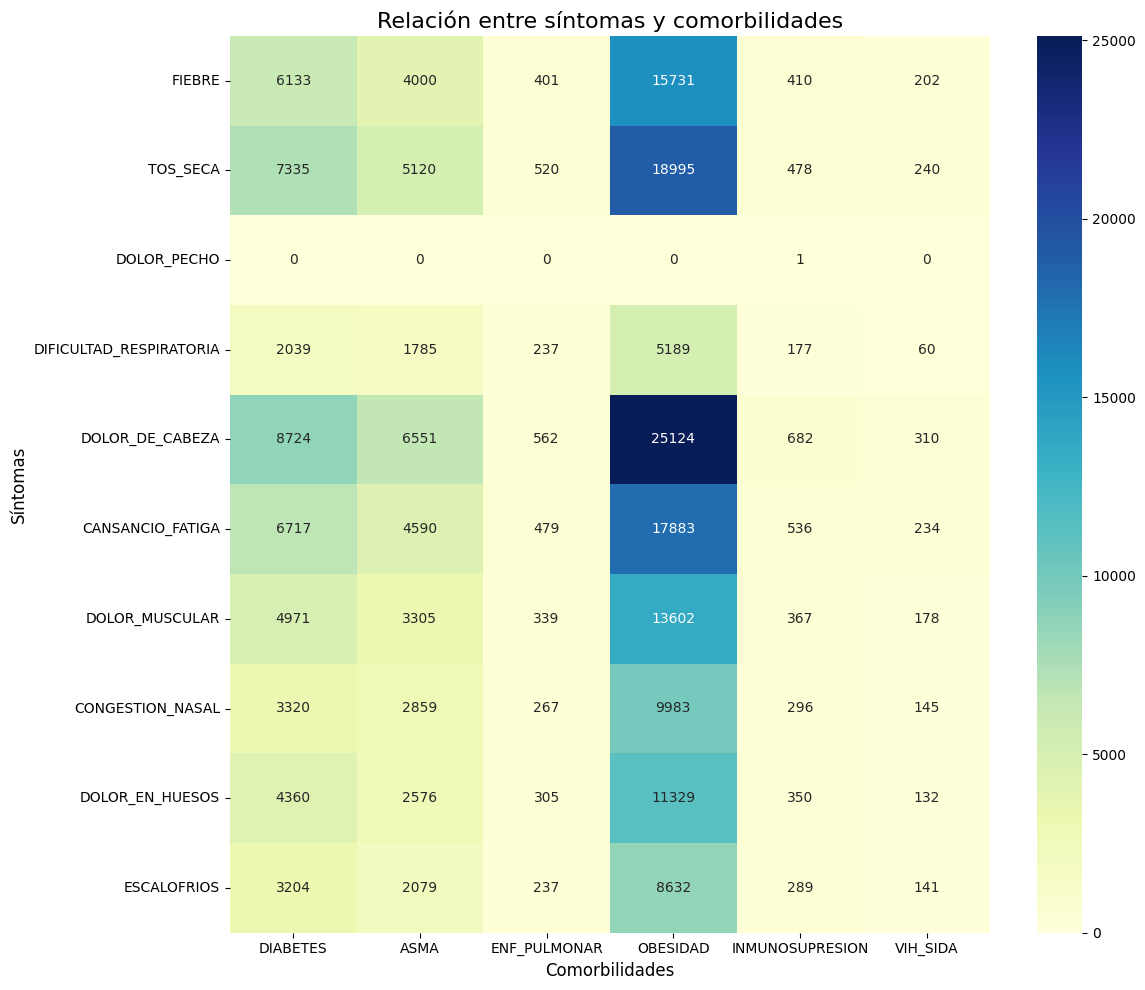

                         DIABETES    ASMA  ENF_PULMONAR  OBESIDAD  \
FIEBRE                     6133.0  4000.0         401.0   15731.0   
TOS_SECA                   7335.0  5120.0         520.0   18995.0   
DOLOR_PECHO                   0.0     0.0           0.0       0.0   
DIFICULTAD_RESPIRATORIA    2039.0  1785.0         237.0    5189.0   
DOLOR_DE_CABEZA            8724.0  6551.0         562.0   25124.0   
CANSANCIO_FATIGA           6717.0  4590.0         479.0   17883.0   
DOLOR_MUSCULAR             4971.0  3305.0         339.0   13602.0   
CONGESTION_NASAL           3320.0  2859.0         267.0    9983.0   
DOLOR_EN_HUESOS            4360.0  2576.0         305.0   11329.0   
ESCALOFRIOS                3204.0  2079.0         237.0    8632.0   

                         INMUNOSUPRESION  VIH_SIDA  
FIEBRE                             410.0     202.0  
TOS_SECA                           478.0     240.0  
DOLOR_PECHO                          1.0       0.0  
DIFICULTAD_RESPIRATORIA     

In [63]:
#  Visuaizaciones adicionales


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



# Listas de síntomas y comorbilidades
sintomas = ['FIEBRE', 'TOS_SECA', 'DOLOR_PECHO', 'DIFICULTAD_RESPIRATORIA', 
            'DOLOR_DE_CABEZA', 'CANSANCIO_FATIGA', 'DOLOR_MUSCULAR', 
            'CONGESTION_NASAL', 'DOLOR_EN_HUESOS', 'ESCALOFRIOS']

comorbilidades = ['DIABETES', 'ASMA', 'ENF_PULMONAR', 'OBESIDAD', 'INMUNOSUPRESION', 'VIH_SIDA']

# Crear una matriz de frecuencias
freq_matrix = pd.DataFrame(index=sintomas, columns=comorbilidades)

for sintoma in sintomas:
    for padecimiento in comorbilidades:
        # Asegurarse que se cuentan solo valores válidos (0 o 1)
        count = df[(df[sintoma].isin([0, 1])) & (df[padecimiento].isin([0, 1])) & 
                   (df[sintoma] == 1) & (df[padecimiento] == 1)].shape[0]
        freq_matrix.loc[sintoma, padecimiento] = count

# Convertir la matriz a valores numéricos
freq_matrix = freq_matrix.astype(float)

# Crear el mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(freq_matrix, annot=True, fmt='.0f', cmap='YlGnBu')

plt.title('Relación entre síntomas y comorbilidades', fontsize=16)
plt.xlabel('Comorbilidades', fontsize=12)
plt.ylabel('Síntomas', fontsize=12)

plt.tight_layout()
plt.show()

# Imprimir la matriz para verificación
print(freq_matrix)

In [57]:
pip install matplotlib-venn

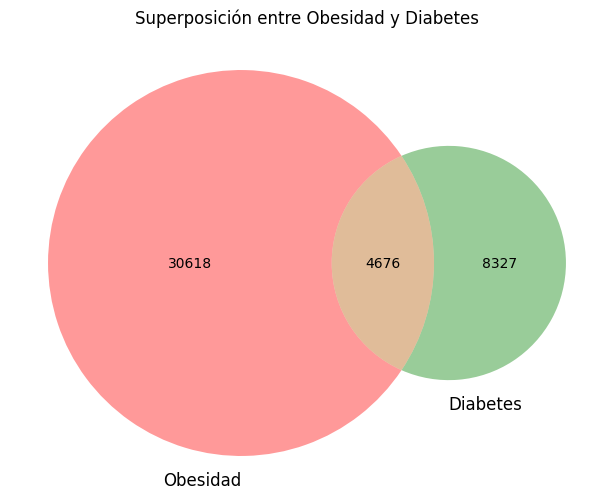

Tabla de contingencia Obesidad vs Diabetes:
DIABETES     0.0   1.0
OBESIDAD              
0.0       209037  8327
1.0        30618  4676


C:\Users\carmen.herrera\AppData\Local\Temp\ipykernel_23056\2678906391.py:35: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sintomas_por_grupo = df.groupby('GRUPO').apply(calcular_promedio_sintomas)


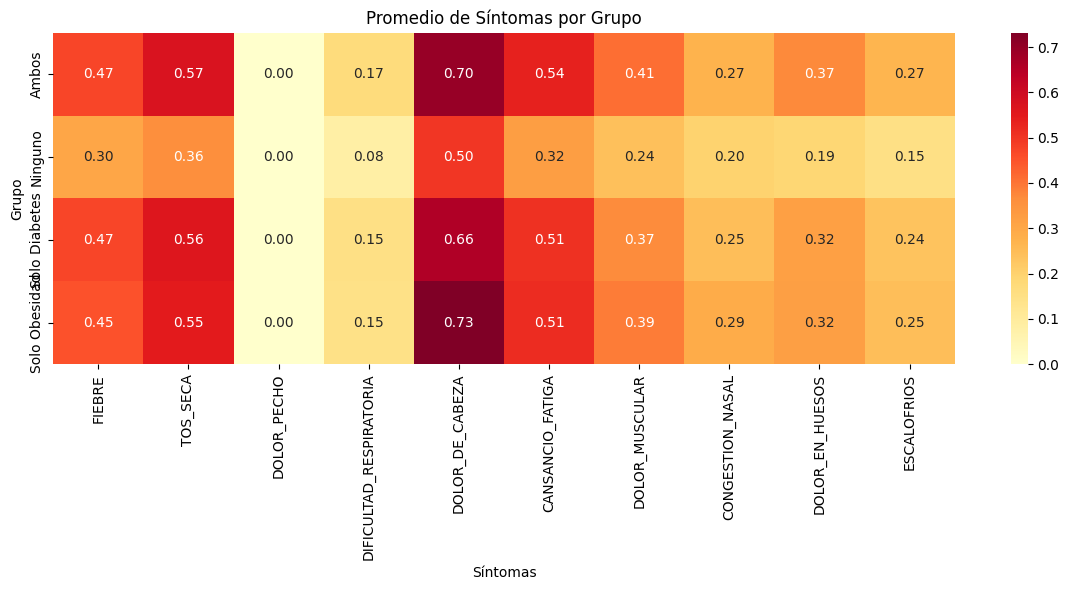


Número de pacientes en cada grupo:
GRUPO
Ninguno          209102
Solo Obesidad     30618
Solo Diabetes      8327
Ambos              4676
Name: count, dtype: int64

Promedio de síntomas por grupo:
                 FIEBRE  TOS_SECA  DOLOR_PECHO  DIFICULTAD_RESPIRATORIA  \
GRUPO                                                                     
Ambos          0.473098  0.571704     0.000000                 0.168703   
Ninguno        0.303652  0.361953     0.000033                 0.082613   
Solo Diabetes  0.472500  0.561800     0.000000                 0.150680   
Solo Obesidad  0.452247  0.546014     0.000000                 0.147204   

               DOLOR_DE_CABEZA  CANSANCIO_FATIGA  DOLOR_MUSCULAR  \
GRUPO                                                              
Ambos                 0.696892          0.535048        0.410932   
Ninguno               0.497365          0.323200        0.241875   
Solo Diabetes         0.658683          0.508003        0.367553   
Solo Obesida

In [58]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn2



# 1. Diagrama de Venn para Obesidad y Diabetes
plt.figure(figsize=(10, 6))
venn2([set(df[df['OBESIDAD'] == 1].index), set(df[df['DIABETES'] == 1].index)], 
      set_labels=('Obesidad', 'Diabetes'))
plt.title('Superposición entre Obesidad y Diabetes')
plt.show()

# 2. Tabla de contingencia
contingency_table = pd.crosstab(df['OBESIDAD'], df['DIABETES'])
print("Tabla de contingencia Obesidad vs Diabetes:")
print(contingency_table)

# 3. Análisis de síntomas
sintomas = ['FIEBRE', 'TOS_SECA', 'DOLOR_PECHO', 'DIFICULTAD_RESPIRATORIA', 
            'DOLOR_DE_CABEZA', 'CANSANCIO_FATIGA', 'DOLOR_MUSCULAR', 
            'CONGESTION_NASAL', 'DOLOR_EN_HUESOS', 'ESCALOFRIOS']

def calcular_promedio_sintomas(grupo):
    return grupo[sintomas].mean()

# Crear grupos
df['GRUPO'] = 'Ninguno'
df.loc[(df['OBESIDAD'] == 1) & (df['DIABETES'] == 0), 'GRUPO'] = 'Solo Obesidad'
df.loc[(df['OBESIDAD'] == 0) & (df['DIABETES'] == 1), 'GRUPO'] = 'Solo Diabetes'
df.loc[(df['OBESIDAD'] == 1) & (df['DIABETES'] == 1), 'GRUPO'] = 'Ambos'

# Calcular promedio de síntomas por grupo
sintomas_por_grupo = df.groupby('GRUPO').apply(calcular_promedio_sintomas)

# Visualizar resultados
plt.figure(figsize=(12, 6))
sns.heatmap(sintomas_por_grupo, annot=True, cmap='YlOrRd', fmt='.2f')
plt.title('Promedio de Síntomas por Grupo')
plt.ylabel('Grupo')
plt.xlabel('Síntomas')
plt.tight_layout()
plt.show()

# Imprimir estadísticas
print("\nNúmero de pacientes en cada grupo:")
print(df['GRUPO'].value_counts())

print("\nPromedio de síntomas por grupo:")
print(sintomas_por_grupo)

Estadísticas de variables numéricas para casos positivos:
               EDAD
count  49019.000000
mean      39.861768
std       15.136099
min        0.000000
25%       28.000000
50%       38.000000
75%       50.000000
max      105.000000


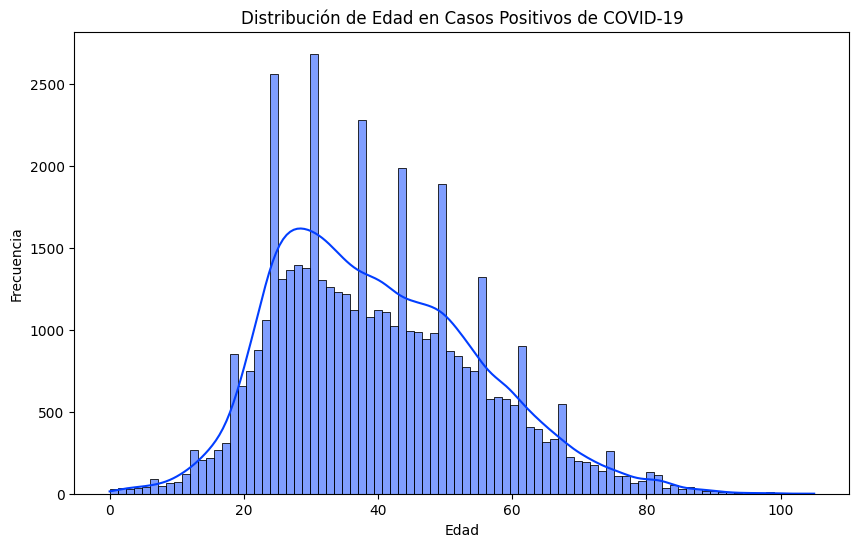

Número total de casos positivos: 49019


In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Filtrar los casos positivos
positivos = df[df['RESULTADO_LABORATORIO'] == 'POSITIVO COVID']

# 2. Calcular estadísticas básicas para EDAD
variables_numericas = ['EDAD']  
estadisticas = positivos[variables_numericas].describe()
print("Estadísticas de variables numéricas para casos positivos:")
print(estadisticas)


# 3. Visualizar la distribución de edad para casos positivos
plt.figure(figsize=(10, 6))
sns.histplot(positivos['EDAD'], kde=True)
plt.title('Distribución de Edad en Casos Positivos de COVID-19')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Imprimir el número total de casos positivos
print(f"Número total de casos positivos: {len(positivos)}")


In [65]:
pip install plotly


   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
    --------------------------------------- 0.3/19.1 MB ? eta -:--:--
   ------ --------------------------------- 3.1/19.1 MB 11.5 MB/s eta 0:00:02
   --------- ------------------------------ 4.7/19.1 MB 10.6 MB/s eta 0:00:02
   -------------- ------------------------- 6.8/19.1 MB 9.8 MB/s eta 0:00:02
   ----------------------- ---------------- 11.0/19.1 MB 12.3 MB/s eta 0:00:01
   ---------------------------- ----------- 13.6/19.1 MB 12.4 MB/s eta 0:00:01
   ---------------------------------- ----- 16.5/19.1 MB 12.5 MB/s eta 0:00:01
   ------------------------------------- -- 17.8/19.1 MB 12.1 MB/s eta 0:00:01
   ---------------------------------------  18.9/19.1 MB 11.8 MB/s eta 0:00:01
   ---------------------------------------  18.9/19.1 MB 11.8 MB/s eta 0:00:01
   ---------------------------------------  18.9/19.1 MB 11.8 MB/s eta 0:00:01
   ---------------------------------------- 19.1/19.1 MB 8.5 MB/s eta 0:00

In [66]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np

# Función para calcular la prevalencia y frecuencia
def create_prevalence_df(df, columns):
    def safe_mean(series):
        numeric_series = pd.to_numeric(series, errors='coerce')
        return np.mean(numeric_series == 1) * 100

    def safe_sum(series):
        numeric_series = pd.to_numeric(series, errors='coerce')
        return np.sum(numeric_series == 1)

    prevalence = df[columns].apply(safe_mean)
    frequency = df[columns].apply(safe_sum)
    
    result_df = pd.DataFrame({
        'Característica': prevalence.index,
        'Prevalencia (%)': prevalence.values,
        'Frecuencia': frequency.values
    }).sort_values('Prevalencia (%)', ascending=False)
    
    total_row = pd.DataFrame({
        'Característica': ['TOTAL'],
        'Prevalencia (%)': [result_df['Prevalencia (%)'].mean()],
        'Frecuencia': [result_df['Frecuencia'].sum()]
    })
    
    return pd.concat([result_df, total_row]).reset_index(drop=True)

# Función para crear tabla con plotly
def create_plotly_table(data, title):
    fig = go.Figure(data=[go.Table(
        header=dict(values=list(data.columns),
                    fill_color='#007bff',
                    align='center',
                    font=dict(color='white', size=12)),
        cells=dict(values=[data[col] for col in data.columns],
                   fill_color=['#f8f9fa']*len(data.columns),
                   align='center'))
    ])
    fig.update_layout(title=title, title_x=0.5)
    fig.show()

# Función para crear gráfico de barras
def create_bar_chart(data, title):
    fig = go.Figure(data=[go.Bar(
        x=data['Característica'],
        y=data['Prevalencia (%)'],
        text=[f"{p:.2f}%<br>({f})" for p, f in zip(data['Prevalencia (%)'], data['Frecuencia'])],
        textposition='auto',
    )])
    fig.update_layout(
        title=title,
        xaxis_title='Característica',
        yaxis_title='Prevalencia (%)',
        title_x=0.5,
        xaxis={'categoryorder':'total descending'}
    )
    fig.show()

# Listas definidas de síntomas y comorbilidades
symptom_columns = [
    'DOLOR_PECHO', 'PARARSE', 'CONVULSIONES', 'FIEBRE', 'TOS_SECA',
    'CONGESTION_NASAL', 'CANSANCIO_FATIGA', 'TOS_CON_ESPECTORACION_FLEMA',
    'DIFICULTAD_RESPIRATORIA', 'ATAQUE_AL_ESTADO_GENERAL', 'DOLOR_DE_CABEZA',
    'IRRITABILIDAD', 'ESCALOFRIOS', 'DOLOR_EN_HUESOS', 'DOLOR_MUSCULAR',
    'ESCURRIMIENTO_NASAL', 'ARDOR_DE_GARGANTA', 'GRIPA_O_RESFRIADO',
    'CONJUNTIVITIS', 'DIARREA', 'VOMITO', 'DOLOR_ABDOMINAL', 'OTRO',
    'RESPIRACION_RAPIDA'
]

comorbidity_columns = [
    'DIABETES', 'ENF_PULMONAR', 'ASMA', 'INMUNOSUPRESION', 'VIH_SIDA',
    'ENFERMEDAD_CARDIACA', 'OBESIDAD', 'HIPERTENSION_ARTERIAL', 
    'INSUF_RENAL_CRONICA', 'TABAQUISMO', 'CANCER', 'ENFERMEDAD_HEPATICA'
]

# Análisis de comorbilidades
comorbidities_df = create_prevalence_df(positivos, comorbidity_columns)
create_plotly_table(comorbidities_df.round(2), 'Prevalencia y Frecuencia de Comorbilidades en Casos Positivos de COVID-19')
create_bar_chart(comorbidities_df[:-1], 'Prevalencia de Comorbilidades en Casos Positivos de COVID-19')

# Análisis de síntomas
symptoms_df = create_prevalence_df(positivos, symptom_columns)
create_plotly_table(symptoms_df.round(2), 'Prevalencia y Frecuencia de Síntomas en Casos Positivos de COVID-19')
create_bar_chart(symptoms_df[:-1], 'Prevalencia de Síntomas en Casos Positivos de COVID-19')

# Imprimir información
print(f"Número total de comorbilidades encontradas: {len(comorbidity_columns)}")
print("Lista de comorbilidades:")
for comorb in comorbidity_columns:
    print(f"- {comorb}")

print(f"\nNúmero total de síntomas encontrados: {len(symptom_columns)}")
print("Lista de síntomas:")
for symptom in symptom_columns:
    print(f"- {symptom}")


Número total de comorbilidades encontradas: 12
Lista de comorbilidades:
- DIABETES
- ENF_PULMONAR
- ASMA
- INMUNOSUPRESION
- VIH_SIDA
- ENFERMEDAD_CARDIACA
- OBESIDAD
- HIPERTENSION_ARTERIAL
- INSUF_RENAL_CRONICA
- TABAQUISMO
- CANCER
- ENFERMEDAD_HEPATICA

Número total de síntomas encontrados: 24
Lista de síntomas:
- DOLOR_PECHO
- PARARSE
- CONVULSIONES
- FIEBRE
- TOS_SECA
- CONGESTION_NASAL
- CANSANCIO_FATIGA
- TOS_CON_ESPECTORACION_FLEMA
- DIFICULTAD_RESPIRATORIA
- ATAQUE_AL_ESTADO_GENERAL
- DOLOR_DE_CABEZA
- IRRITABILIDAD
- ESCALOFRIOS
- DOLOR_EN_HUESOS
- DOLOR_MUSCULAR
- ESCURRIMIENTO_NASAL
- ARDOR_DE_GARGANTA
- GRIPA_O_RESFRIADO
- CONJUNTIVITIS
- DIARREA
- VOMITO
- DOLOR_ABDOMINAL
- OTRO
- RESPIRACION_RAPIDA


In [50]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np

# Función para calcular la prevalencia y frecuencia por sexo
def create_prevalence_df_by_sex(df, columns, sex_column='SEXO'):
    sex_groups = df[sex_column].unique()
    prevalence_dict = {}
    
    for sex in sex_groups:
        sex_df = df[df[sex_column] == sex]
        def safe_mean(series):
            numeric_series = pd.to_numeric(series, errors='coerce')
            return np.mean(numeric_series == 1) * 100

        def safe_sum(series):
            numeric_series = pd.to_numeric(series, errors='coerce')
            return np.sum(numeric_series == 1)

        prevalence = sex_df[columns].apply(safe_mean)
        frequency = sex_df[columns].apply(safe_sum)

        result_df = pd.DataFrame({
            'Característica': prevalence.index,
            'Prevalencia (%)': prevalence.values,
            'Frecuencia': frequency.values
        }).sort_values('Prevalencia (%)', ascending=False)

        total_row = pd.DataFrame({
            'Característica': ['TOTAL'],
            'Prevalencia (%)': [result_df['Prevalencia (%)'].mean()],
            'Frecuencia': [result_df['Frecuencia'].sum()]
        })
        
        result_df = pd.concat([result_df, total_row]).reset_index(drop=True)
        prevalence_dict[sex] = result_df

    return prevalence_dict

# Función para crear tabla con plotly por sexo
def create_plotly_table_by_sex(data, sex, title):
    fig = go.Figure(data=[go.Table(
        header=dict(values=list(data.columns),
                    fill_color='#007bff',
                    align='center',
                    font=dict(color='white', size=12)),
        cells=dict(values=[data[col] for col in data.columns],
                   fill_color=['#f8f9fa']*len(data.columns),
                   align='center'))
    ])
    fig.update_layout(title=f"{title} ({sex})", title_x=0.5)
    fig.show()

# Función para crear gráfico de barras por sexo
def create_bar_chart_by_sex(data, sex, title):
    fig = go.Figure(data=[go.Bar(
        x=data['Característica'],
        y=data['Prevalencia (%)'],
        text=[f"{p:.2f}%<br>({f})" for p, f in zip(data['Prevalencia (%)'], data['Frecuencia'])],
        textposition='auto',
    )])
    fig.update_layout(
        title=f"{title} ({sex})",
        xaxis_title='Característica',
        yaxis_title='Prevalencia (%)',
        title_x=0.5,
        xaxis={'categoryorder':'total descending'}
    )
    fig.show()

# Listas de síntomas
symptom_columns = [
    'DOLOR_PECHO', 'PARARSE', 'CONVULSIONES', 'FIEBRE', 'TOS_SECA',
    'CONGESTION_NASAL', 'CANSANCIO_FATIGA', 'TOS_CON_ESPECTORACION_FLEMA',
    'DIFICULTAD_RESPIRATORIA', 'ATAQUE_AL_ESTADO_GENERAL', 'DOLOR_DE_CABEZA',
    'IRRITABILIDAD', 'ESCALOFRIOS', 'DOLOR_EN_HUESOS', 'DOLOR_MUSCULAR',
    'ESCURRIMIENTO_NASAL', 'ARDOR_DE_GARGANTA', 'GRIPA_O_RESFRIADO',
    'CONJUNTIVITIS', 'DIARREA', 'VOMITO', 'DOLOR_ABDOMINAL', 'OTRO',
    'RESPIRACION_RAPIDA'
]

# Análisis de síntomas por sexo
prevalence_by_sex = create_prevalence_df_by_sex(positivos, symptom_columns)

# Crear tablas y gráficos por sexo
for sex, df in prevalence_by_sex.items():
    # Crear tabla
    create_plotly_table_by_sex(df.round(2), sex, 'Prevalencia y Frecuencia de Síntomas en Casos Positivos de COVID-19 por Sexo')
    
    # Crear gráfico de barras
    create_bar_chart_by_sex(df[:-1], sex, 'Prevalencia de Síntomas en Casos Positivos de COVID-19 por Sexo')

# Imprimir información por sexo
for sex, df in prevalence_by_sex.items():
    print(f"\nAnálisis de síntomas para el sexo: {sex}")
    print(f"Número total de síntomas encontrados: {len(symptom_columns)}")
    print("Lista de síntomas:")
    for symptom in symptom_columns:
        print(f"- {symptom}")



Análisis de síntomas para el sexo: MUJER
Número total de síntomas encontrados: 24
Lista de síntomas:
- DOLOR_PECHO
- PARARSE
- CONVULSIONES
- FIEBRE
- TOS_SECA
- CONGESTION_NASAL
- CANSANCIO_FATIGA
- TOS_CON_ESPECTORACION_FLEMA
- DIFICULTAD_RESPIRATORIA
- ATAQUE_AL_ESTADO_GENERAL
- DOLOR_DE_CABEZA
- IRRITABILIDAD
- ESCALOFRIOS
- DOLOR_EN_HUESOS
- DOLOR_MUSCULAR
- ESCURRIMIENTO_NASAL
- ARDOR_DE_GARGANTA
- GRIPA_O_RESFRIADO
- CONJUNTIVITIS
- DIARREA
- VOMITO
- DOLOR_ABDOMINAL
- OTRO
- RESPIRACION_RAPIDA

Análisis de síntomas para el sexo: HOMBRE
Número total de síntomas encontrados: 24
Lista de síntomas:
- DOLOR_PECHO
- PARARSE
- CONVULSIONES
- FIEBRE
- TOS_SECA
- CONGESTION_NASAL
- CANSANCIO_FATIGA
- TOS_CON_ESPECTORACION_FLEMA
- DIFICULTAD_RESPIRATORIA
- ATAQUE_AL_ESTADO_GENERAL
- DOLOR_DE_CABEZA
- IRRITABILIDAD
- ESCALOFRIOS
- DOLOR_EN_HUESOS
- DOLOR_MUSCULAR
- ESCURRIMIENTO_NASAL
- ARDOR_DE_GARGANTA
- GRIPA_O_RESFRIADO
- CONJUNTIVITIS
- DIARREA
- VOMITO
- DOLOR_ABDOMINAL
- OTRO
- RE

In [53]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np

# Función para calcular la prevalencia y frecuencia por sexo, omitiendo NaN
def create_prevalence_df_by_sex(df, columns, sex_column='SEXO'):
    # Filtrar los valores NaN en la columna de sexo
    df = df[df[sex_column].notna()]
    
    sex_groups = df[sex_column].unique()
    prevalence_dict = {}
    
    for sex in sex_groups:
        sex_df = df[df[sex_column] == sex]
        def safe_sum(series):
            numeric_series = pd.to_numeric(series, errors='coerce')
            return np.sum(numeric_series == 1)

        frequency = sex_df[columns].apply(safe_sum)

        result_df = pd.DataFrame({
            'Característica': frequency.index,
            'Frecuencia': frequency.values
        }).sort_values('Frecuencia', ascending=False)

        total_row = pd.DataFrame({
            'Característica': ['TOTAL'],
            'Frecuencia': [result_df['Frecuencia'].sum()]
        })
        
        result_df = pd.concat([result_df, total_row]).reset_index(drop=True)
        prevalence_dict[sex] = result_df

    return prevalence_dict

# Función para crear gráfico de líneas por sexo
def create_line_chart_by_sex(prevalence_by_sex, title):
    fig = go.Figure()
    
    for sex, df in prevalence_by_sex.items():
        fig.add_trace(go.Scatter(
            x=df['Característica'][:-1],  # Omitimos la fila TOTAL
            y=df['Frecuencia'][:-1],
            mode='lines+markers',
            name=f'Sexo: {sex}',
            text=[f"Frecuencia: {f}" for f in df['Frecuencia'][:-1]],
        ))
    
    fig.update_layout(
        title=title,
        xaxis_title='Síntomas',
        yaxis_title='Frecuencia',
        title_x=0.5,
        xaxis={'categoryorder':'total descending'}
    )
    fig.show()

# Listas de síntomas
symptom_columns = [
    'DOLOR_PECHO', 'PARARSE', 'CONVULSIONES', 'FIEBRE', 'TOS_SECA',
    'CONGESTION_NASAL', 'CANSANCIO_FATIGA', 'TOS_CON_ESPECTORACION_FLEMA',
    'DIFICULTAD_RESPIRATORIA', 'ATAQUE_AL_ESTADO_GENERAL', 'DOLOR_DE_CABEZA',
    'IRRITABILIDAD', 'ESCALOFRIOS', 'DOLOR_EN_HUESOS', 'DOLOR_MUSCULAR',
    'ESCURRIMIENTO_NASAL', 'ARDOR_DE_GARGANTA', 'GRIPA_O_RESFRIADO',
    'CONJUNTIVITIS', 'DIARREA', 'VOMITO', 'DOLOR_ABDOMINAL', 'OTRO',
    'RESPIRACION_RAPIDA'
]

# Análisis de frecuencia de síntomas por sexo, omitiendo NaN en la columna sexo
prevalence_by_sex = create_prevalence_df_by_sex(positivos, symptom_columns)

# Crear gráfico de líneas por sexo
create_line_chart_by_sex(prevalence_by_sex, 'Frecuencia de Síntomas en Casos Positivos de COVID-19 por Sexo')



Estadísticas de variables numéricas para casos negativos:
                EDAD
count  106976.000000
mean       38.691435
std        27.606994
min      -179.000000
25%        27.000000
50%        36.000000
75%        48.000000
max      1855.000000


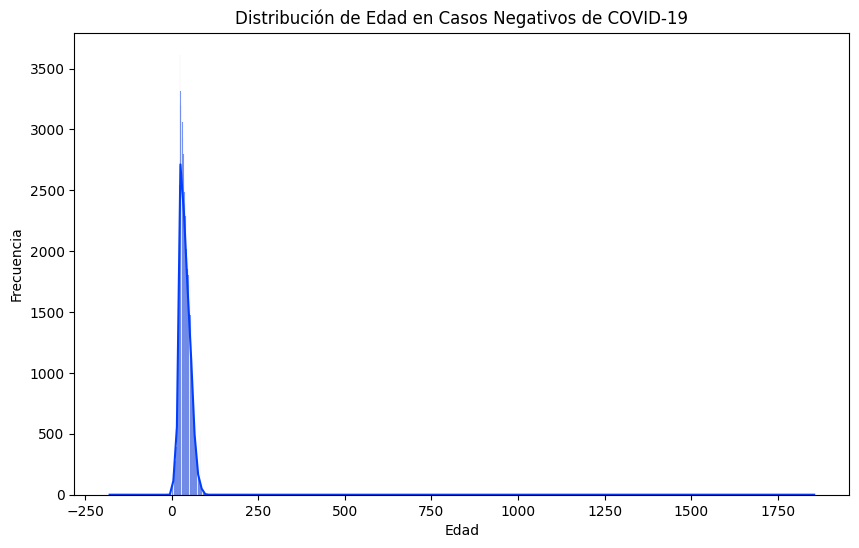

Número total de casos negativos: 108419


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Filtrar los casos negativos
negativos = df[df['RESULTADO_LABORATORIO'] == 'NEGATIVO COVID']

# 2. Calcular estadísticas básicas para EDAD
variables_numericas = ['EDAD']  
estadisticas_negativos = negativos[variables_numericas].describe()
print("Estadísticas de variables numéricas para casos negativos:")
print(estadisticas_negativos)

# 3. Visualizar la distribución de edad para casos negativos
plt.figure(figsize=(10, 6))
sns.histplot(negativos['EDAD'], kde=True)
plt.title('Distribución de Edad en Casos Negativos de COVID-19')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Imprimir el número total de casos negativos
print(f"Número total de casos negativos: {len(negativos)}")
